# Unraveling Funding Relationships: Visualizing Grants and Funding Patterns

In [17]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load organizations dataset
organizations_data = pd.read_csv('organizations.csv')

# Load grants dataset
grants_data = pd.read_csv('grants.csv')


Checking organization's head dataset

In [18]:
organizations_data.head()
#organization_pd.info()

,Id,Org_name,Grants funded,Grants received,Address,EIN,NTEE
0,564,U.S. Department of Housing and Urban Developme...,261042360.0,NaN,"Detroit, MI\nUnited States",NaN,NaN
1,308,Kresge Foundation,179868712.0,NaN,"30600 TELEGRAPH ROAD STE 2345\nBINGHAM, MI\nUn...",381359217.0,"Philanthropy, Voluntarism, and Grantmaking » P..."
2,225,Ford Foundation,150695201.0,NaN,"320 E 43rd St\nNew York, NY 10017\nUnited States",131684331.0,"Philanthropy, Voluntarism, and Grantmaking » C..."
3,301,W.K. Kellogg Foundation,141567649.0,NaN,"1 Michigan Ave. East\nBattlecreek, MI 49017\nU...",381359264.0,"Philanthropy, Voluntarism, and Grantmaking » P..."
4,306,"John S. and James L. Knight Foundation, Inc.",70218743.0,NaN,"200 S. Biscayne Blvd.\nSuite 3300\nMiami, FL 3...",650464177.0,"Philanthropy, Voluntarism, and Grantmaking » P..."


Checking grant's dataset

In [19]:
grants_data.head()

,Grant ID,to,from,Amount,Recipient ID,Funder ID,Start year,End year
0,4739,Michigan Urban Farming Initiative (MUFI),Scotts Miracle-Gro,40000.0,4737,4738,"Sun, 01 Feb 2015 00:00:00 -0500","Mon, 01 Feb 2016 00:00:00 -0500"
1,4736,Sherwood Prototype,New Economy Initiative,100000.0,4735,388,"Sun, 01 Feb 2015 00:00:00 -0500","Mon, 01 Feb 2016 00:00:00 -0500"
2,4734,J&G Pallets and Trucking,New Economy Initiative,100000.0,4733,388,"Sun, 01 Feb 2015 00:00:00 -0500","Mon, 01 Feb 2016 00:00:00 -0500"
3,4732,Midnight Golf Program,Detroit Employment Solutions Corporation,350000.0,363,4705,"Sun, 01 Jan 2012 00:00:00 -0500","Tue, 01 Jan 2013 00:00:00 -0500"
4,4731,"Youth Connection, Inc",Detroit Employment Solutions Corporation,340748.0,558,4705,"Sun, 01 Jan 2012 00:00:00 -0500","Tue, 01 Jan 2013 00:00:00 -0500"


In [20]:
# Extract relevant columns from grants dataset
funding_relationships = grants_data[['to', 'from']]
funding_relationships.head()


,to,from
0,Michigan Urban Farming Initiative (MUFI),Scotts Miracle-Gro
1,Sherwood Prototype,New Economy Initiative
2,J&G Pallets and Trucking,New Economy Initiative
3,Midnight Golf Program,Detroit Employment Solutions Corporation
4,"Youth Connection, Inc",Detroit Employment Solutions Corporation


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing


# Initialize the Decision Tree classifier
classifier = DecisionTreeClassifier()

# Convert string data to numeric labels
label_encoder = preprocessing.LabelEncoder()
funding_relationships_encoded = funding_relationships.apply(label_encoder.fit_transform)

# Split the data into features (X) and labels (y)
X = funding_relationships_encoded.drop('to', axis=1)
y = funding_relationships_encoded['to']

# Train the classifier
classifier.fit(X, y)


DecisionTreeClassifier()

In [14]:
!pip install networkx

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Python311\\share'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 2.1/2.1 MB 2.0 MB/s eta 0:00:00


In [26]:
import networkx as nx

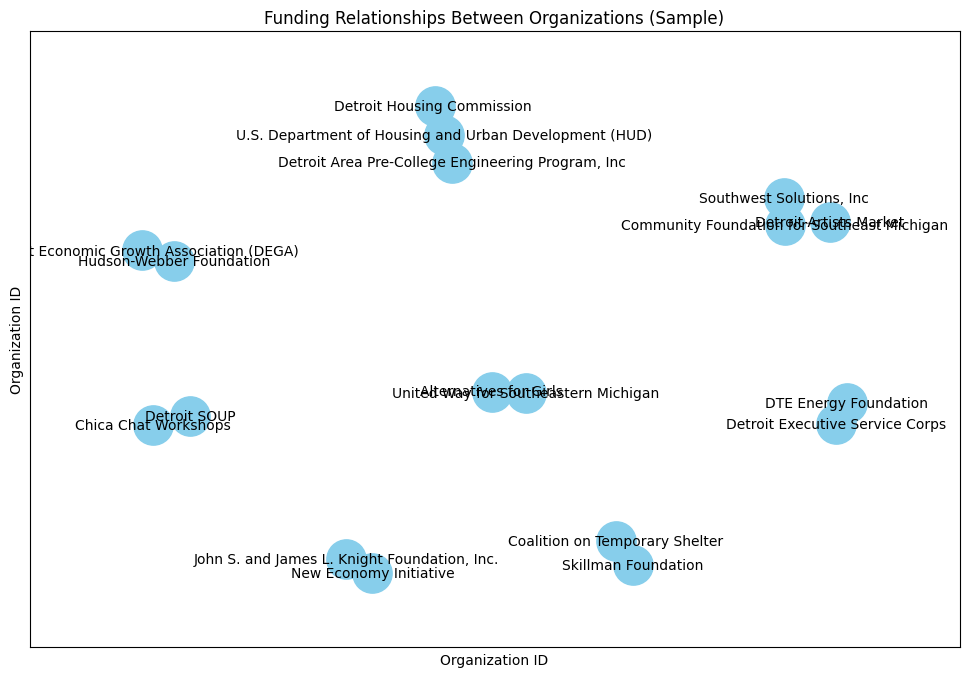

In [32]:
import random

# Select a random sample of 100 rows from the grants dataset
sample_size = 10
sample_grants_data = grants_data.sample(n=sample_size, random_state=42)

# Extract relevant columns from the sample dataset
sample_funding_relationships = sample_grants_data[['to', 'from']]

# Create an empty graph
sample_graph = nx.Graph()

# Add edges representing funding relationships from the sample dataset
for index, row in sample_funding_relationships.iterrows():
    sample_graph.add_edge(row['from'], row['to'])

# Generate node positions using a spring layout algorithm
sample_pos = nx.spring_layout(sample_graph)

# Draw nodes and edges with customized styles
plt.figure(figsize=(12, 8))
nx.draw_networkx(sample_graph, sample_pos, with_labels=True, node_size=800, font_size=10, edge_color='gray', node_color='skyblue')

# Set plot title and axis labels
plt.title("Funding Relationships Between Organizations (Sample)")
plt.xlabel("Organization ID")
plt.ylabel("Organization ID")

# Adjust plot margins
plt.margins(0.1)

# Display the graph
plt.show()
